# Statystyczne metody przetwarzania danych 

## Laboratorium 3 - algorytm Najbliższej Średniej (NM)


### Opis
Celem laboratorium jest implementacja klasyfikatora najbliższej średniej NM (*Nearest Mean*).

### Zbiór danych

Zbiór danych znajduje się w `dataset/leaf.csv`. Jest to zbiór danych pobrany z adresu: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE I NAZWISKO].zip
    +-- 📜 Lab03.ipynb
    +-- 📂 dataset
        +-- 📜 leaf.csv
        +-- 📜 ReadMe.pdf
```

*UWAGA: Wysyłając zadanie potwierdasz, że wykonałeś je samodzielnie i jest to Twoja indywidualna praca i materiał przedstawiony w tej pracy jest dla Ciebie zrozumiały.*

### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:
* Wczytaj dane.
* Zaimplementuj funkcję, która zwraca macierz kowariancji (*uwaga: biblioteka `numpy` posiada gotową implementację `cov` z którą możesz porównać wynik*).

\begin{equation*}
C = \frac{1}{n - 1} \sum_{i=1}^n (X_i - \bar X)(X_i - \bar X)^T
\end{equation*}

* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Euklidesa**.
* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Machalanobisa**.

    \begin{equation*}
    D_j = \sqrt{ (x - \mu_j)^T S_j^{-1}(x - \mu_j) },
    \end{equation*}

    gdzie:
    * $D_j$ to odległość klasyfikowanej próbki do $j$-tej klasy (grupy, klastra), 
    * $\mu_j$ to wektor ze średnimi wartościami cech w obrębie $j$-tej klasy, 
    * $S_j^{-1}$ to odwrócona macierz kowariancji $j$-tej klasy, 
    * a $x$ to klasyfikowana próbka.

* Opisz wyniki klasyfikatorów i porównaj je z klasyfikatorem *k*NN (porównaj w kontekście różnych metryk - obowiązkowo tablica pomyłek).

> Podpowiedź 1: Do obliczenia macierzy odwrotnej możesz użyć gotową implementację, np. funkcję `linalg.inv` z biblioteki `numpy`.

> Podpowiedź 2: Do wszelkich podstawowych operacji na macierzach (mnożenie, transpozycja, dodawanie, odejmowanie, itp.) możesz zastosować gotową implementację, np. bibliotekę `numpy`.

> UWAGA 1: W niniejszym zadaniu jest dowolność implementacji (nie trzeba trzymać się struktury z poprzedniego zadania), jednak algorytm NM należy zaimplementować samodzielnie bez korzystania z istniających rozwiązań (jak np. z biblioteki `scikit-learn`).

> UWAGA 2: Wszystkie wykonane elementy zadania powinny posiadać stosowne komentarze i opisy.


**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość). Warstwa prezentacji danych to jeden z głównych elementów wpływających na ocenę.**

Przykład (na podstawie tablicy pomyłek):

Źle (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```


<span style="text-decoration:underline">Referencje</span>

1. Mahalanobis, P C, _On test and measures of group divergence : theoretical formulae_, Journal and Proceedings of Asiatic Society of Bengal (New Series) Vol. 26, pp. 541-588. 1930. (URL: http://library.isical.ac.in:8080/xmlui/bitstream/handle/10263/1639/029.pdf)
2. McLachlan, Goeffrey J. _Mahalanobis distance_, Resonance, pp. 20-26. 1999. (URL: https://www.ias.ac.in/article/fulltext/reso/004/06/0020-0026)

### PONIŻEJ WYKONAJ ZADANIE

In [2]:
# creates labels
from sklearn.metrics import confusion_matrix
import numpy as np
import operator
from random import randint
import warnings


# I expect to see RuntimeWarnings in this block
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    
ATTRIBUTE_NAMES = ["Class", "Specimen No.", "Eccentricity", "Aspect Ratio", "Elongation", "Solidity", "Stochastic Convexity", "Isoperimetric Factor", "Maximal Indentation Depth", "Lobedness", "Average Intensity", "Average Contrast", "Smoothness", "Third moment", "Uniformity", "Entropy"]
CLASS_NAMES = \
"""Quercus suber 
Salix atrocinera 
Populus nigra 
Alnus sp. 
Quercus robur 
Crataegus monogyna 
Ilex aquifolium 
Nerium oleander 
Betula pubescens 
Tilia tomentosa 
Acer palmatum 
Celtis sp. 
Corylus avellana 
Castanea sativa 
Populus alba 
Acer negundo 
Taxus bacatta 
Papaver sp. 
Polypolium vulgare 
Pinus sp. 
Fraxinus sp. 
Primula vulgaris 
Erodium sp. 
Bougainvillea sp. 
Arisarum vulgare 
Euonymus japonicus 
Ilex perado ssp. azorica 
Magnolia soulangeana 
Buxus sempervirens 
Urtica dioica 
Podocarpus sp. 
Acca sellowiana 
Hydrangea sp. 
Pseudosasa japonica 
Magnolia grandiflora 
Geranium sp. 
Aesculus californica 
Chelidonium majus 
Schinus terebinthifolius 
Fragaria vesca """.split("\n")
# import data
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f, allow_pickle=True)
    train, test = data['train'], data['test']
print(train.shape) # verify shape






#assign_k_NN(test[0], train, [4,5], 3)
CLASS_COUNT = 40

classIndexes = []
for i in range(CLASS_COUNT):
    classIndexes.append([])
for i, sample in enumerate(train):
    classIndexes[int(sample[0])-1].append(int(i))
"""
for i, sampleClass in enumerate(classIndexes):
    print(i,len(sampleClass))
"""
classIndexesTest = []
for i in range(CLASS_COUNT):
    classIndexesTest.append([])
for i, sample in enumerate(test):
    classIndexesTest[int(sample[0])-1].append(int(i))

 
classMeans = [train[classIndexes[i]].mean(axis=0) for i in range(CLASS_COUNT)]



def covariance_matrix(samples, rowvar=False):
    var_axis = 0 if rowvar else 1
    samp_axis = 1 if rowvar else 0
    mean = samples.mean(axis=samp_axis)
    result = np.zeros((samples.shape[var_axis], samples.shape[var_axis]))
    if(rowvar):
        for sample in samples.T:
            p = np.outer((sample - mean), (sample - mean))
            result += p
    else:
        for sample in samples:
            p = np.outer((sample - mean), (sample - mean))
            result += p
    result /= samples.shape[samp_axis]-1
    return result

def test_covariance_matrix():
    #x = np.random.rand(randint(2,4), randint(2,4))
    x = np.array([[1,2,3],[3,2,1]])
    numpyimpl = np.cov(x, rowvar=True)
    myimpl = covariance_matrix(x, rowvar=True)
    np.testing.assert_almost_equal(numpyimpl, myimpl)
    numpyimpl = np.cov(x, rowvar=False)
    myimpl = covariance_matrix(x, rowvar=False)
    np.testing.assert_almost_equal(numpyimpl, myimpl)

test_covariance_matrix()


def assign_nm_euclidean(test_sample, class_means, class_indices, attribute_indices):
    min_dist = np.linalg.norm(test_sample[attribute_indices]-class_means[class_indices][0][attribute_indices])
    min_class = 0
    for i, m in enumerate(class_means[class_indices]):
        d = np.linalg.norm(test_sample[attribute_indices]-m[attribute_indices])
        if(d < min_dist):
            min_dist = d
            min_class = i
    return class_indices[min_class];


def assign_nm_machalan(test_sample, class_means, class_indices, attribute_indices, class_cov_matrices):
    diff_vect = np.array(test_sample[attribute_indices]-class_means[class_indices][0][attribute_indices])
    comat = np.linalg.inv(class_cov_matrices[class_indices[0]])
    min_dist = np.sqrt(np.matmul(np.matmul(diff_vect,comat),diff_vect))
    min_class = 0
    for i, m in enumerate(class_means[class_indices]):
        diff_vect = np.array(test_sample[attribute_indices]-class_means[class_indices][i][attribute_indices])
        comat = np.linalg.inv(class_cov_matrices[class_indices[i]])
        d = np.sqrt(np.matmul(np.matmul(diff_vect,comat),diff_vect))
        if(d < min_dist):
            min_dist = d
            min_class = i
    return class_indices[min_class];
        
                


def run_nm_test(classes, attributes, distance_function):
    chosen_train_samples = np.concatenate(
        [train[classIndexes[i],:] for i in classes],
        axis=0
    ) # pick train samples from chosen classes
    chosen_test_samples = np.concatenate(
        [test[classIndexesTest[i],:] for i in classes],
        axis=0
    ) # filter out test samples that do not belong to the chosen classes
    
    test_classes = [sample[0] for sample in chosen_test_samples] # pick indices of classes that are tested
    if(distance_function == 'euclidean'):
        test_nearest_means = \
            [
                 # cast classMeans to np.array to slice it with lists    
                1+int(assign_nm_euclidean(test_sample, np.array(classMeans), classes, attributes))
                for test_sample in chosen_test_samples # for each test sample from the chosen ones (i.e. belonging to the chosen classes)
            ]
    else:
        
        classCovMatrices = []
        for i in range(CLASS_COUNT):
            try:
                # calculate covariance matrix only for selected attributes
                classCovMatrices.append(covariance_matrix(train[classIndexes[i]][:,attributes]))
            except:
                classCovMatrices.append(None)
        test_nearest_means = \
            [
                1+int(assign_nm_machalan(test_sample, np.array(classMeans), classes, attributes, classCovMatrices)) # pick only these means that are from the chosen classes(cast to np.array to be able to slice it with a list)    
                for test_sample in chosen_test_samples # for each test sample from the chosen ones (i.e. belonging to the chosen classes)
            ]
    
    totalTestSamples = chosen_test_samples.shape[0]
    correctSamples = 0
    for i, sample in enumerate(chosen_test_samples):
        if(test_nearest_means[i] == sample[0]): correctSamples+=1

    return {
        "total_samples": totalTestSamples,
        "correct_samples": correctSamples,
        "confusion_matrix": confusion_matrix(test_classes, test_nearest_means)
    }


def print_test_result(r:dict, matrix_class_indexes=None):
    """ Prints formatted result dict of run_knn_test()
    """
    print("MN: {} correct out of {} total. Accuracy: {:.2f}%".format(r['correct_samples'], r['total_samples'], r['correct_samples']/r['total_samples']*100))
    if(matrix_class_indexes):
        print("{:8.8s}".format("TRU\PRED"),end='|')
        for index in matrix_class_indexes: #print top row
            print("{:.8s}".format(CLASS_NAMES[index]),end='|')
        print()
        for i, row in enumerate(r["confusion_matrix"]): #print rows
            print("{:.8s}".format(CLASS_NAMES[i]),end='|')
            for col in row:
                print("{:8d}".format(int(col)),end='|')
            print()


(2244, 16)


<ipython-input-2-fba7be430987>:85: RuntimeWarning: Mean of empty slice.
  classMeans = [train[classIndexes[i]].mean(axis=0) for i in range(CLASS_COUNT)]
E:\ProgramyMiniconda3\envs\smpd\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [6]:
                
PARAM_CLASSES = [2,4]
PARAM_ATTRIBUTES = [4,15] 
print_test_result(run_nm_test(PARAM_CLASSES, PARAM_ATTRIBUTES, 'euclidean'), PARAM_CLASSES)


print("\n8 CLASSES 5 ATTRIBUTES")
PARAM_CLASSES = [0,1,2,3,4,5,6,7]
PARAM_ATTRIBUTES = [4,7,9,11,13] 

print("\nEUCLIDEAN DISTANCE")
print_test_result(run_nm_test(PARAM_CLASSES, PARAM_ATTRIBUTES, 'euclidean'), PARAM_CLASSES)

print("\nMACHALANOBIS' DISTANCE")
print_test_result(run_nm_test(PARAM_CLASSES, PARAM_ATTRIBUTES, 'machalan'), PARAM_CLASSES)
print("---------------------------------------------------")

print("\n12 CLASSES 5 ATTRIBUTES")
PARAM_CLASSES = [0,1,2,3,4,5,6,7, 8,9,10,11]
PARAM_ATTRIBUTES = [4,7,9,11,13] 
print("\nEUCLIDEAN DISTANCE")
print_test_result(run_nm_test(PARAM_CLASSES, PARAM_ATTRIBUTES, 'euclidean'), PARAM_CLASSES)

print("\nMACHALANOBIS' DISTANCE")
print_test_result(run_nm_test(PARAM_CLASSES, PARAM_ATTRIBUTES, 'machalan'), PARAM_CLASSES)
print("---------------------------------------------------")

print("\n4 CLASSES 5 ATTRIBUTES")
PARAM_CLASSES = [0,1,2,3]
PARAM_ATTRIBUTES = [4,7,9,11,13] 
print("\nEUCLIDEAN DISTANCE")
print_test_result(run_nm_test(PARAM_CLASSES, PARAM_ATTRIBUTES, 'euclidean'), PARAM_CLASSES)

print("\nMACHALANOBIS' DISTANCE")
print_test_result(run_nm_test(PARAM_CLASSES, PARAM_ATTRIBUTES, 'machalan'), PARAM_CLASSES)
print("---------------------------------------------------")

print("\n8 CLASSES 10 ATTRIBUTES")
PARAM_CLASSES = [0,1,2,3]
PARAM_ATTRIBUTES = [4,5,6,7,8,9,10,11,12,13] 
print("\nEUCLIDEAN DISTANCE")
print_test_result(run_nm_test(PARAM_CLASSES, PARAM_ATTRIBUTES, 'euclidean'), PARAM_CLASSES)

print("\nMACHALANOBIS' DISTANCE")
print_test_result(run_nm_test(PARAM_CLASSES, PARAM_ATTRIBUTES, 'machalan'), PARAM_CLASSES)




MN: 105 correct out of 110 total. Accuracy: 95.45%
TRU\PRED|Populus |Quercus |
Quercus |      55|       0|
Salix at|       5|      50|

8 CLASSES 5 ATTRIBUTES

EUCLIDEAN DISTANCE
MN: 320 correct out of 429 total. Accuracy: 74.59%
TRU\PRED|Quercus |Salix at|Populus |Alnus sp|Quercus |Crataegu|Ilex aqu|Nerium o|
Quercus |      40|       0|       0|      15|       0|       0|       0|       0|
Salix at|      10|      34|       0|       0|       0|       0|       0|       0|
Populus |       7|       0|      32|      16|       0|       0|       0|       0|
Alnus sp|       6|       1|       1|      14|       0|       0|       0|       0|
Quercus |       0|       0|       0|       0|      40|       0|      11|       4|
Crataegu|       0|       0|       0|       0|       6|      38|       0|       0|
Ilex aqu|       3|      19|       3|       0|       5|       0|      36|       0|
Nerium o|       0|       0|       0|       0|       2|       0|       0|      86|

MACHALANOBIS' DISTANCE
MN: 341 

<ipython-input-2-fba7be430987>:92: RuntimeWarning: Mean of empty slice.
  mean = samples.mean(axis=samp_axis)
E:\ProgramyMiniconda3\envs\smpd\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Salix at|Populus |Alnus sp|Quercus |Crataegu|Ilex aqu|Nerium o|
Quercus |      44|       0|       0|      11|       0|       0|       0|       0|
Salix at|      14|      27|       0|       0|       0|       0|       3|       0|
Populus |      12|       0|      37|       5|       0|       0|       1|       0|
Alnus sp|       1|       0|       0|      20|       0|       0|       1|       0|
Quercus |       0|       0|       0|       0|      55|       0|       0|       0|
Crataegu|       0|       0|       0|       0|       0|      44|       0|       0|
Ilex aqu|       7|       7|       0|       6|      12|       0|      34|       0|
Nerium o|       0|       0|       0|       0|       7|       1|       0|      80|
---------------------------------------------------

12 CLASSES 5 ATTRIBUTES

EUCLIDEAN DISTANCE
MN: 349 correct out of 660 total. Accuracy: 52.88%
TRU\PRED|Quercus |Salix at|Populus |Alnus sp|Quercus |Crataegu|Ilex aqu|Nerium o|Betula p|Tilia to|Acer pal|Celtis s|
Quercus |     

<ipython-input-2-fba7be430987>:92: RuntimeWarning: Mean of empty slice.
  mean = samples.mean(axis=samp_axis)
E:\ProgramyMiniconda3\envs\smpd\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


MN: 490 correct out of 660 total. Accuracy: 74.24%
TRU\PRED|Quercus |Salix at|Populus |Alnus sp|Quercus |Crataegu|Ilex aqu|Nerium o|Betula p|Tilia to|Acer pal|Celtis s|
Quercus |      44|       0|       0|      11|       0|       0|       0|       0|       0|       0|       0|       0|
Salix at|      14|      27|       0|       0|       0|       0|       3|       0|       0|       0|       0|       0|
Populus |       9|       0|      33|       2|       0|       0|       1|       0|      10|       0|       0|       0|
Alnus sp|       1|       0|       0|      20|       0|       0|       1|       0|       0|       0|       0|       0|
Quercus |       0|       0|       0|       0|      53|       0|       0|       0|       0|       0|       0|       2|
Crataegu|       0|       0|       0|       0|       0|      38|       0|       0|       0|       0|       6|       0|
Ilex aqu|       7|       7|       0|       4|      10|       0|      23|       0|       4|       0|       0|      11|
Neriu

<ipython-input-2-fba7be430987>:92: RuntimeWarning: Mean of empty slice.
  mean = samples.mean(axis=samp_axis)
E:\ProgramyMiniconda3\envs\smpd\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-2-fba7be430987>:92: RuntimeWarning: Mean of empty slice.
  mean = samples.mean(axis=samp_axis)
E:\ProgramyMiniconda3\envs\smpd\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


| METHOD | 8C/5A  | 12C/5A | 4C/5A  | 8C/10A |
|--------|--------|--------|--------|--------|
| 1NN    | 80.19% | 68.94% | 71.02% | 67.61% |
| 5NN    | 80.89% | 69.39% | 73.86% | 73.86% |
| 10NN   | 82.75% | 68.64% | 77.27% | 74.43% |
| NM-Euc | 74.59% | 52.88% | 68.18% | 72.16% |
| NM-Mah | 79.49% | 74.24% | 74.43% | 75.57% |

Jak wynika z powyższej tabeli porównawczej, klasyfikator NM wykorzystujący odległość Euklidesa dla analizowanych przypadków produkuje najniższe wartości precyzji ze wszystkich porównywanych metod. Klasyfikator NM wykorzystujący odległość Mahalanobisa charakteryzuje się zbliżonymi rezultatami niezależnie od analizowanego przypadku. Wydaje się działać akceptowalnie zarówno dla małych jak i dużych ilości klas i atrybutów, uzyskując precyzję powyżej 74% w każdym z przypadków. Znacznie lepiej od pozostałych metod radzi sobie w 12C/5A(12 klas, 5 atrybutów) gdzie koniecznie było przypisanie do wielu klas na podstawie niedużej liczby parametrów. Klasyfikatory kNN w przy konfiguracji 8 klas i 5 atrybutów dawały trochę lepszy rezultat względem precyzji.

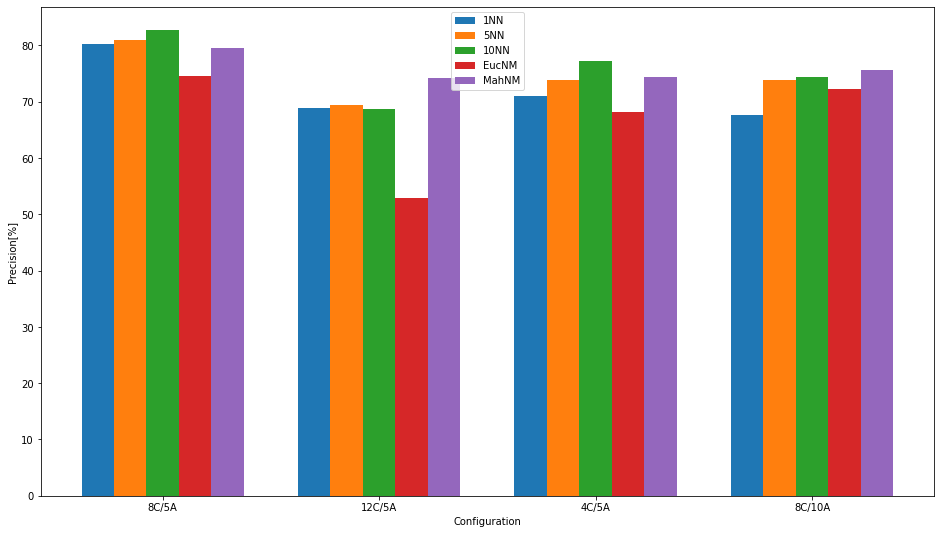

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['8C/5A', '12C/5A', '4C/5A', '8C/10A']
res_1nn = [80.19, 68.94, 71.02, 67.61]
res_5nn = [80.89, 69.39, 73.86, 73.86]
res_10nn =[82.75, 68.64, 77.27, 74.43]
res_enm = [74.59, 52.88, 68.18, 72.16]
res_mnm = [79.49, 74.24, 74.43, 75.57]

x = np.arange(len(labels))
width = 0.15
f, ax = plt.subplots(figsize=(16,9))
y1 = ax.bar(x - 2*width, res_1nn, width, label='1NN')
y2 = ax.bar(x - 1*width, res_5nn, width, label='5NN')
y3 = ax.bar(x - 0*width, res_10nn, width, label='10NN')
y4 = ax.bar(x + 1*width, res_enm, width, label='EucNM')
y5 = ax.bar(x + 2*width, res_mnm, width, label='MahNM')


plt.xticks(x, labels)
plt.xlabel("Configuration")
plt.ylabel("Precision[%]")
plt.legend(["1NN", "5NN", "10NN", 'EucNM', 'MahNM'])
plt.show()


EUCLIDEAN DISTANCE

MACHALANOBIS' DISTANCE


<ipython-input-2-fba7be430987>:92: RuntimeWarning: Mean of empty slice.
  mean = samples.mean(axis=samp_axis)
E:\ProgramyMiniconda3\envs\smpd\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


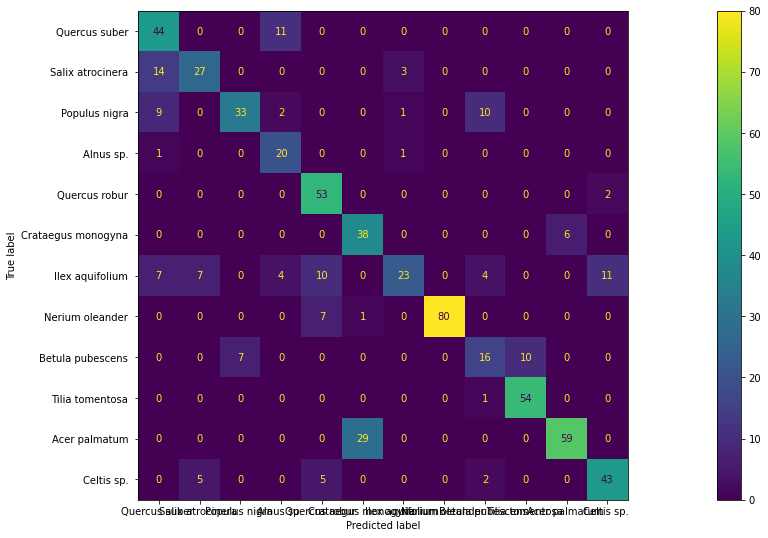

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

PARAM_CLASSES = [0,1,2,3,4,5,6,7, 8,9,10,11]
PARAM_ATTRIBUTES = [4,7,9,11,13] 
print("\nEUCLIDEAN DISTANCE")
#run_nm_test(PARAM_CLASSES, PARAM_ATTRIBUTES, 'euclidean').confusion_matrix

print("\nMACHALANOBIS' DISTANCE")


cm = run_nm_test(PARAM_CLASSES, PARAM_ATTRIBUTES, 'machalan')['confusion_matrix']
ls = np.array(CLASS_NAMES)[PARAM_CLASSES]
fig, ax = plt.subplots(figsize=(32,9))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ls)
disp.plot(ax=fig.gca())
plt.show()